# Introduction: Summarize the problem + explain the steps you plan to take to address the problem
The data set I will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines.I am going to find what attributes will affect the Response Variable (indicates # of cases of wine sold), which is the varaible 'TARGET' here means.
The steps will be:

step 1: load data and Define a question to be investigated.

step 2: Identify + acquire the data I believe will help you answer the question(s) you have.

step 3: Exploratory Data Analysis (EDA)

Step 4: 1)deleted some observations such as the outliners; 2)created some new variables, transformed data via mathematical transforms (e.g.,       Box-Cox, logarithms, etc.)

step 5: re-run your EDA analysis on any variables you have adjusted during Data Preparation and compare / contrast your results to those you       saw prior to performing your Data Preparation adjustments.

step 6: make conclusions for the question to be investigated.


# Step 1

In [1]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. This data set contains information related to flights
# departing from the two major airports in Houston, Texas
filename = "https://raw.githubusercontent.com/YALINYAN-YU/DAV6150/master/M3_Data.csv"
df = pd.read_csv(filename)
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


Research Question: going to find what attributes will affect the number of wine sold.

In [2]:
#check the data type
df.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

In [3]:
#finding the null values
print(df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


There is no null data in the response varaibles in TARGET,  so will not delete any rows here.

In [11]:
df.shape

(12795, 16)

In [9]:
df.nunique()

INDEX                 12795
TARGET                    9
FixedAcidity            470
VolatileAcidity         815
CitricAcid              602
ResidualSugar          2077
Chlorides              1663
FreeSulfurDioxide       999
TotalSulfurDioxide     1370
Density                5933
pH                      497
Sulphates               630
Alcohol                 401
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

In [106]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


# Step 3

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


Text(0.5, 1.0, 'box plot of LabelAppeal')

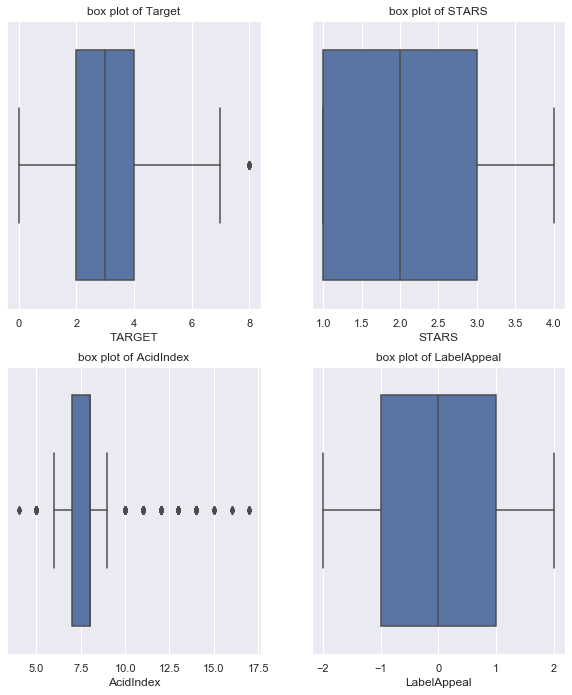

In [89]:
plt.figure(figsize=(10,18))
#boxplot of TARGET
plt.subplot(321)
sns.boxplot(x=df['TARGET'])
plt.title('box plot of Target')

plt.subplot(322)
sns.boxplot(x=df['STARS'])
plt.title('box plot of STARS')

plt.subplot(323)
sns.boxplot(x=df['AcidIndex'])
plt.title('box plot of AcidIndex')


plt.subplot(324)
sns.boxplot(x=df['LabelAppeal'])
plt.title('box plot of LabelAppeal')


we can see there are some outliners for TARGET and AcidIndex


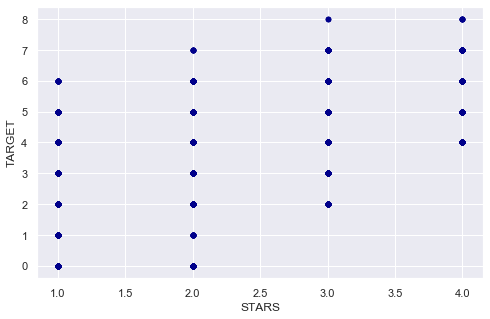

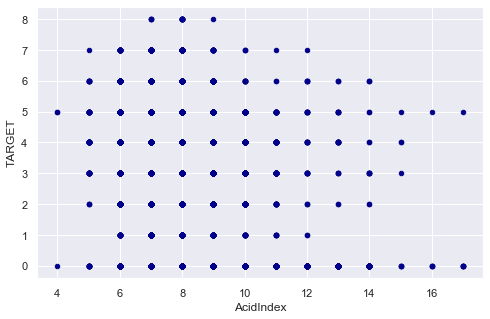

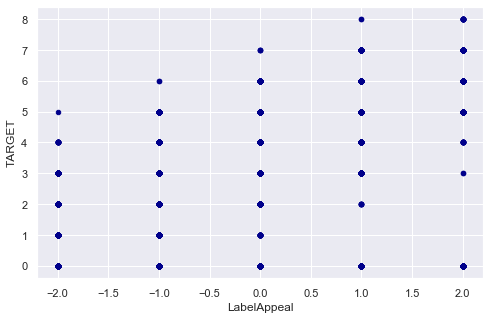

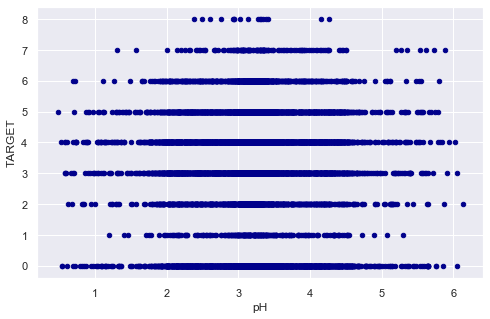

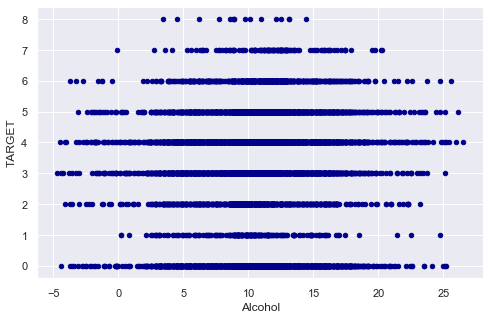

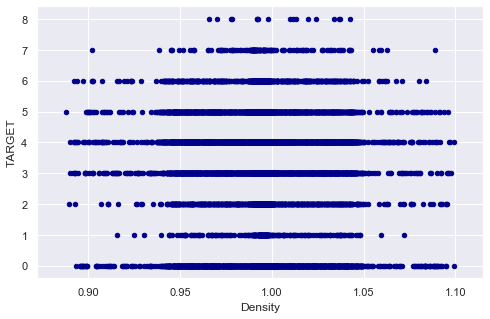

In [87]:
sns.set(rc={'figure.figsize':(8,5)})
ax1 = df.plot.scatter(x='STARS',
                      y='TARGET',
                      c='DarkBlue')

ax2 = df.plot.scatter(x='AcidIndex',
                      y='TARGET',
                      c='DarkBlue')

ax3 = df.plot.scatter(x='LabelAppeal',
                      y='TARGET',
                      c='DarkBlue')

ax4 = df.plot.scatter(x='pH',
                      y='TARGET',
                      c='DarkBlue')

ax5 = df.plot.scatter(x='Alcohol',
                      y='TARGET',
                      c='DarkBlue')

ax6 = df.plot.scatter(x='Density',
                      y='TARGET',
                      c='DarkBlue')


We can see there are positive relation between target and lableAppeal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C644330320>,
      dtype=object)

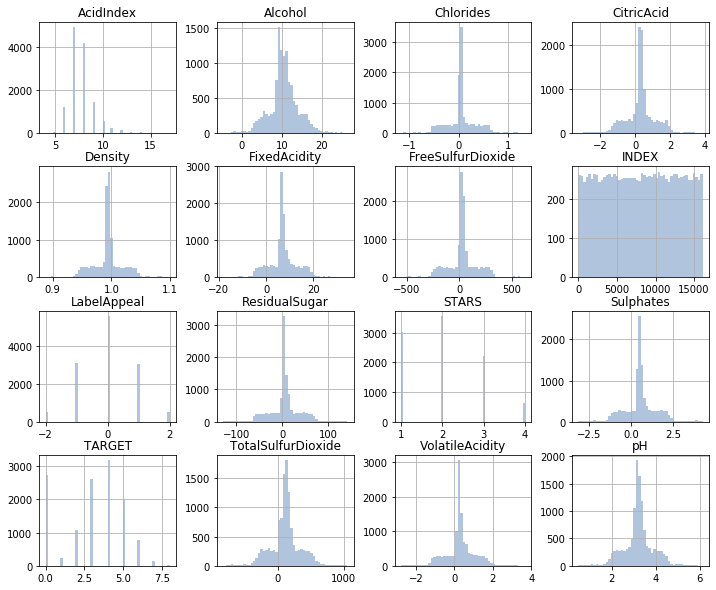

In [28]:
#check the distribution for each attributes - histagram
df.hist(bins=50, color='lightsteelblue', figsize=(12,10))

We can see among all the varaibles the Acidindex and INDEX are not normal distribution, while other varaibles are almost 
follow the normal distribution.

In [30]:
#remove outlines, using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

INDEX                 8069.000000
TARGET                   2.000000
FixedAcidity             4.300000
VolatileAcidity          0.510000
CitricAcid               0.550000
ResidualSugar           17.900000
Chlorides                0.184000
FreeSulfurDioxide       70.000000
TotalSulfurDioxide     181.000000
Density                  0.012795
pH                       0.510000
Sulphates                0.580000
Alcohol                  3.400000
LabelAppeal              2.000000
AcidIndex                1.000000
STARS                    2.000000
dtype: float64


In [32]:
df02 = df[-((df < (Q1-1.5*IQR)) |(df > (Q3 +1.5*IQR))).any(axis=1)]
df02.shape

(889, 16)

In [33]:
df02.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,889.000000,889.000000,889.000000,889.000000,889.000000,840.000000,829.000000,831.000000,838.000000,889.000000,866.000000,796.000000,848.000000,889.000000,889.000000,676.000000
mean,7930.737908,3.167604,7.192238,0.347171,0.297053,6.461071,0.060171,32.325511,122.340692,0.994151,3.203637,0.530879,10.555739,-0.067492,7.563555,2.019231
std,4549.475274,1.849649,3.462783,0.416614,0.455767,13.322412,0.143789,49.968655,158.490471,0.009399,0.426243,0.473907,2.755350,0.894144,0.836027,0.913074
min,28.000000,0.000000,-1.100000,-0.630000,-0.790000,-28.700000,-0.305000,-104.000000,-244.000000,0.968580,2.200000,-0.580000,4.000000,-2.000000,6.000000,1.000000
25%,4091.000000,2.000000,6.000000,0.180000,0.120000,1.500000,0.031000,14.500000,46.000000,0.991140,3.022500,0.360000,9.000000,-1.000000,7.000000,1.000000
50%,7910.000000,3.000000,6.900000,0.280000,0.300000,4.700000,0.047000,31.000000,124.500000,0.994120,3.200000,0.500000,10.400000,0.000000,7.000000,2.000000
75%,11850.000000,4.000000,8.200000,0.520000,0.480000,12.512500,0.084000,49.000000,201.750000,0.997360,3.390000,0.700000,12.100000,1.000000,8.000000,3.000000
max,16128.000000,7.000000,15.900000,1.400000,1.400000,42.700000,0.424000,175.000000,478.000000,1.019260,4.230000,1.730000,17.500000,2.000000,9.000000,4.000000


After remove only 889 rows left, so maybe this is not a good way, we are not going to use the removed new dataframe.

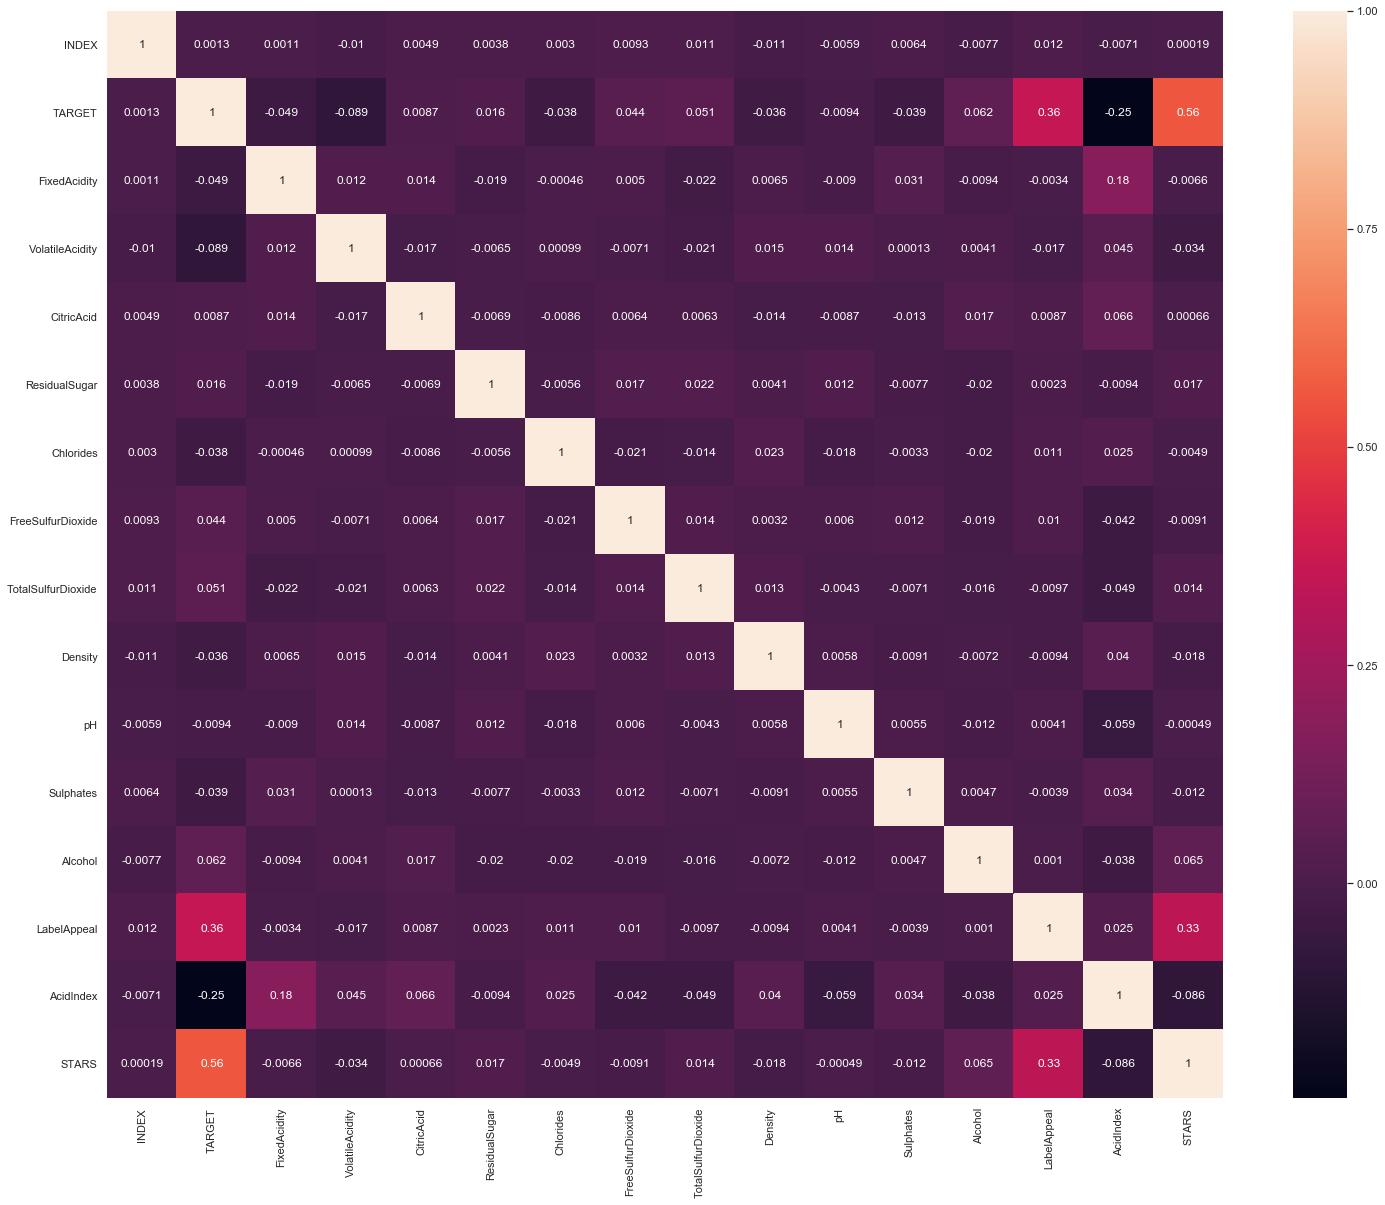

In [83]:
# find the correlation between each 2 varaibles by using correlation metrix in heatmap
auto_corr = df.corr()
sns.heatmap(auto_corr, annot=True)
sns.set(rc={'figure.figsize':(30,20)})


We can see there are very comparatively strong positive correlation between the Target and STARS and LabelAppeal, and there is a comparatively negetive 
correlation between TARGET and AcidIndex.


# Step 4

# Delete outliners of the response varaible

In [90]:
# find all TARGET rows that have TARGET values whose values are > 
# 2.5 standard deviations from the mean of data in that column
TARGET_outliers = df[np.abs(df['TARGET'] - df['TARGET'].mean() ) > (2.5 * df['TARGET'].std() )]
TARGET_outliers.shape

(17, 16)

In [91]:
TARGET_outliers.TARGET.describe()

count    17.0
mean      8.0
std       0.0
min       8.0
25%       8.0
50%       8.0
75%       8.0
max       8.0
Name: TARGET, dtype: float64

In [92]:
# check the first 10 rows
TARGET_outliers.head(10)

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
344,428,8,7.9,1.25,0.34,-39.2,-0.058,226.0,17.0,0.99235,2.50,1.05,13.1,2,9,4.0
1098,1384,8,13.5,-0.78,0.89,5.4,0.044,31.0,513.0,1.00998,3.30,0.50,4.5,2,8,4.0
1453,1836,8,7.0,0.44,-0.56,10.3,0.039,41.0,704.0,1.01331,2.60,0.64,3.4,2,7,4.0
2054,2576,8,7.7,0.19,0.27,-33.2,0.057,512.0,155.0,1.04268,2.94,0.41,11.0,2,8,3.0
2377,3004,8,4.8,1.07,-1.34,-6.5,0.365,-147.0,-55.5,1.03741,2.76,0.46,8.9,2,8,4.0
3498,4412,8,0.2,0.26,-1.07,2.2,0.635,31.0,113.0,1.01963,2.93,1.20,8.6,1,8,4.0
4456,5616,8,7.0,-0.16,0.03,16.3,-0.413,291.0,87.0,0.99220,3.35,0.47,12.1,2,8,4.0
4939,6228,8,0.8,0.20,1.23,14.2,0.056,70.0,212.5,0.97786,3.14,0.29,8.9,2,8,NaN
5356,6766,8,18.0,0.19,0.27,13.9,NaN,-517.0,210.0,0.99807,2.94,1.43,8.8,2,8,4.0
5571,7044,8,9.2,0.33,0.32,-25.3,0.040,222.0,373.0,0.97842,3.31,0.40,13.1,2,7,4.0


In [93]:
# create a temporary series for the TARGET variable
TARGET_temp = df.TARGET
TARGET_temp.shape

(12795,)

In [96]:
TARGET_temp.describe()

count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

In [94]:
# now remove the extreme outliers from the temporary series
DD2 = TARGET_temp.drop(TARGET_outliers.index.values)
DD2.shape

(12778,)

In [95]:
# get summary statistics after the extreme outliers have been removed
DD2.describe()

count    12778.000000
mean         3.022460
std          1.919091
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: TARGET, dtype: float64

Note how the mean decreased from 3.029074 to 3.022460 while the standard deviation decreased from 1.926368 to 1.919091: these are some changes.

Let's look at how the removal of the extreme outliers effected the distribution of the variable:

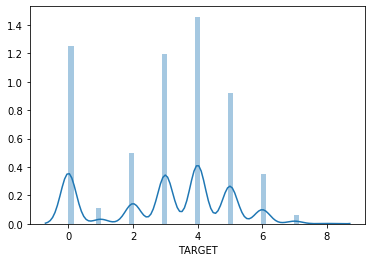

In [57]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(DepDelay_temp[DepDelay_temp.notnull()]);

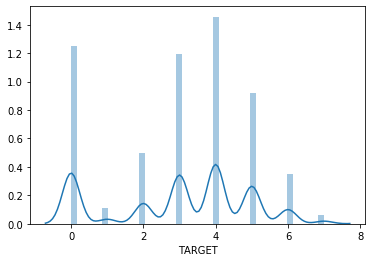

In [56]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(DD2[DD2.notnull()]);

The distribution almost the same, but without the outliner of 8 anymore.

# Using of Box-Cox

In [109]:
#transfer the not normal distribution varaible into more normal by using box-cox, before that make sure that all the value in
#AcidIndex is positive.

from scipy import stats
import numpy as np

trans_AI = stats.boxcox(df.AcidIndex)

trans_AI

(array([0.76791409, 0.75580938, 0.76791409, ..., 0.7392129 , 0.7392129 ,
        0.75580938]), -1.1933367797138714)

In [117]:
ar = trans_AI[0]

array([0.76791409, 0.75580938, 0.76791409, ..., 0.7392129 , 0.7392129 ,
       0.75580938])

In [130]:
#add a new column of 'trans_AI' to the previous dataframe

df['trans_AI'] = trans_AI[0]
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,trans_AI
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0,0.767914
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0,0.755809
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0,0.767914
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0,0.739213
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0,0.777102


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6432384A8>]],
      dtype=object)

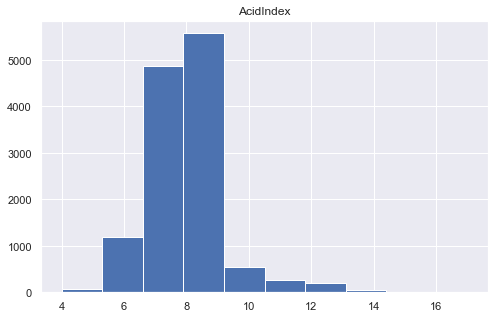

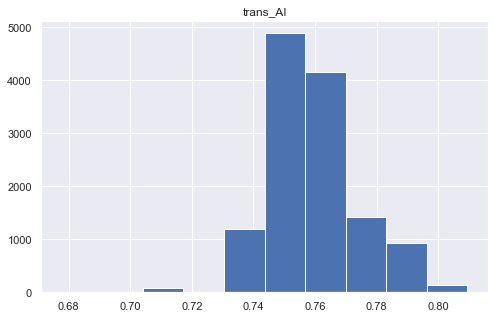

In [127]:
#see the distribution of AcidIndex and trans_AI, compare their distribution before and after box-cox.
sns.set(rc={'figure.figsize':(8,5)})

df.hist(column='AcidIndex')

df.hist(column='trans_AI')



After the box-cox transaction, we can see that the new column is more close to normal distribution.

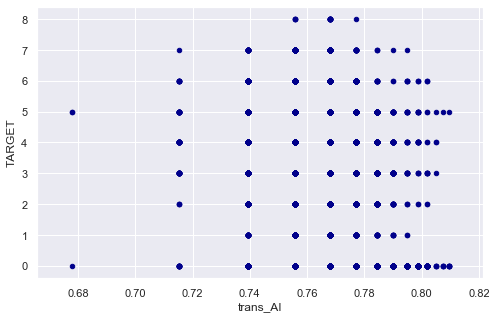

In [128]:
#check the scat plot of trans_AI with TARGET to see the correlation

sns.set(rc={'figure.figsize':(8,5)})
ax1 = df.plot.scatter(x='trans_AI',
                      y='TARGET',
                      c='DarkBlue')

# Step 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C647B6F780>,
      dtype=object)

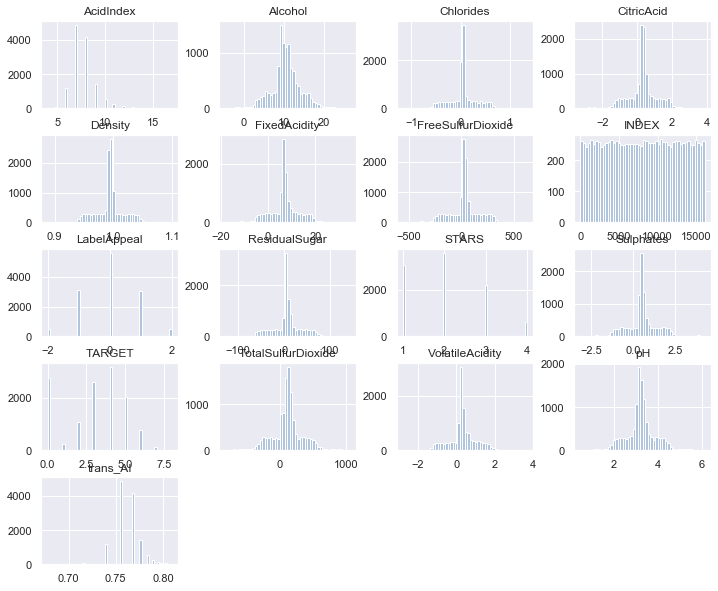

In [131]:
#check the distribution for each attributes - histagram
df.hist(bins=50, color='lightsteelblue', figsize=(12,10))

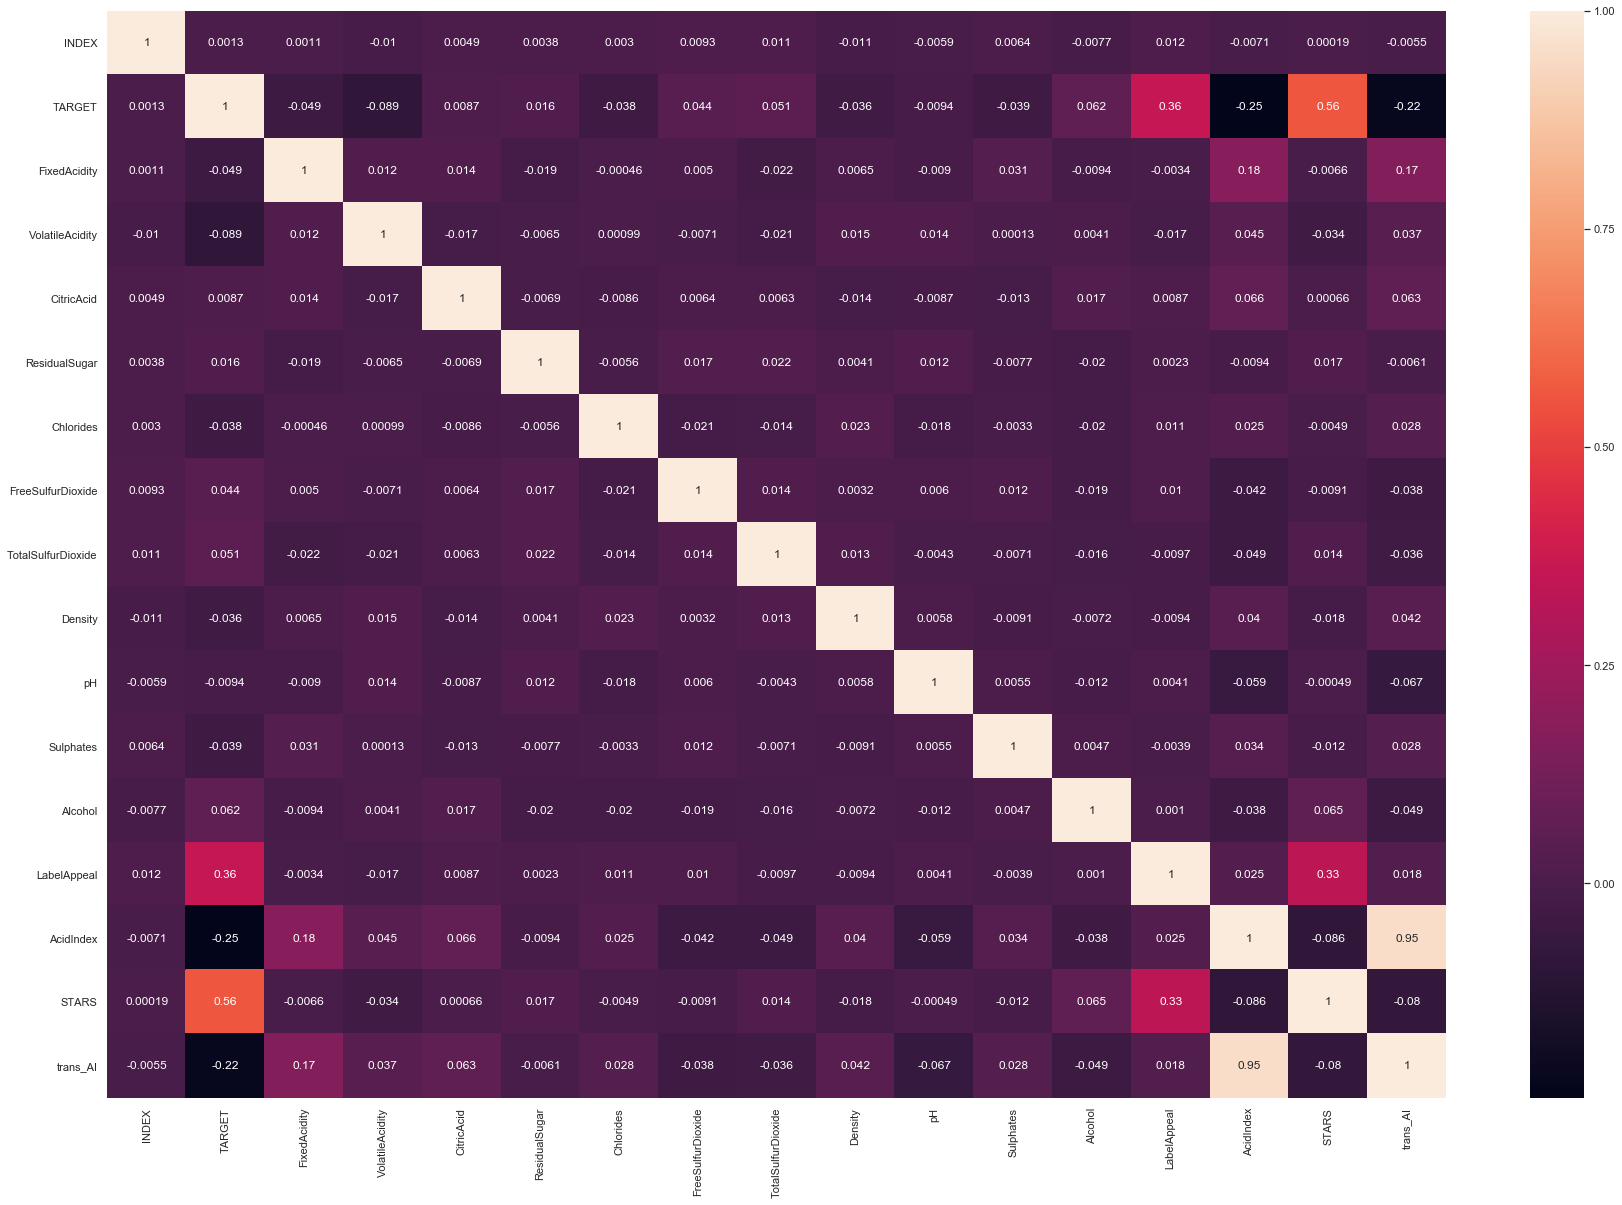

In [122]:
# find the correlation between each 2 varaibles for the new datafram by using correlation metrix in heatmap
auto_corr = df.corr()
sns.heatmap(auto_corr, annot=True)
sns.set(rc={'figure.figsize':(30,20)})

# Step 6

Conclusions：
1. Among all factors, the LabelAppeal, AcidIndex and STARS will affect the number of wine being sold.
2. The appeal of the design of the label on the bottle is strongger, the sales of wine is better;
3. The stars, which means the wine rating as determined by experts, is more, the sales of wine is better;
4. The AcidIndex is higher, the sales of wine is worse, so people maybe perfer to buy wine with lower acidity.
5. The correlation between stars is 0.56,  while it is 0.36 for labelAppeal, with the number of wine sales, so stars influnce more compared 
   with labelappeal to the wine sales. 

